# PCA

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:


np.random.seed(23)

# Class 1
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)
df = pd.DataFrame(class1_sample, columns=['feature1','feature2','feature3'])
df['target'] = 1

# Class 2
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)
df1 = pd.DataFrame(class2_sample, columns=['feature1','feature2','feature3'])
df1['target'] = 0

# Combine
df = pd.concat([df, df1], ignore_index=True)

# Shuffle
df = df.sample(40, random_state=23)


In [3]:
df.head()

,feature1,feature2,feature3,target
18,-0.331617,-1.632386,0.619114,1
23,1.010229,1.437830,2.327788,0
8,0.241106,-0.952510,-0.136267,1
22,1.676860,4.187503,-0.080565,0
33,2.823378,-0.332863,2.637391,0


In [31]:
df.shape

(40, 4)

In [35]:
df.feature1.values

array([-0.66938283,  0.50422715, -0.16846565,  1.08727791,  2.09004923,
       -1.0119167 ,  0.85852885,  1.17071536, -0.01145648,  0.87827128,
       -0.20036274,  0.71458037, -1.59495163, -0.09747667,  0.53496314,
        0.2756231 ,  0.45035432, -0.41908357, -1.2783337 , -0.74742268,
        0.86711774,  0.2040204 , -1.26266138,  0.26075704,  1.34229583,
       -0.70080891, -0.21304077,  0.69985297, -0.39905584, -0.22448087,
       -1.98695948, -0.04273094, -0.12504953,  0.40686216,  1.37957585,
       -2.57134993,  1.56619581,  0.72902185, -1.04782923, -1.24747084])

In [4]:
import plotly.express as px 

fig = px.scatter_3d(
    df, 
    x=df['feature1'], 
    y=df['feature2'], 
    z=df['feature3'], 
    color=df['target'].astype('str')  # color points based on target labels
)

fig.update_traces(
    marker=dict(
        size=12,  # size of points
        line=dict(
            width=2,  # border thickness around points
            color='DarkSlateGrey'  # border color
        )
    ),
    selector=dict(mode='markers')  # apply these settings only to scatter markers
)

fig.show()


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:,0:3]= scaler.fit_transform(df.iloc[:,0:3])

In [7]:
cov_matrix = np.cov([df.iloc[:,0] , df.iloc[:,1] , df.iloc[:,2]])
print("covariance matrix:" , cov_matrix)

covariance matrix: [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [8]:
eigen_values , eigen_vector = np.linalg.eig(cov_matrix)

In [9]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [10]:
eigen_vector

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [11]:
pc = eigen_vector[0:2]

In [12]:
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [14]:
transformed_df = np.dot(df.iloc[:,0:3] , pc.T)

new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()
     

,PC1,PC2,target
0,1.726114,0.492511,1
1,-0.220797,-1.441911,0
2,0.688605,0.658084,1
3,-3.367715,-0.254627,0
4,0.227326,-2.669841,0


In [25]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

PCA Using Scikit-Learn

In [71]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)

In [72]:
wine.shape

(6497, 13)

In [73]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [82]:
wine = wine.dropna()

In [83]:
wine.type.unique()

array(['white', 'red'], dtype=object)

In [84]:
wine.shape

(6463, 13)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np 

In [86]:
x = wine.iloc[:,1:]
y= wine.iloc[:,0]

In [87]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [88]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [89]:
y_encoded.shape

(6463,)

In [90]:
x_train , x_test , y_train , y_test =train_test_split(x,y_encoded , random_state=42 , test_size=0.2)

In [95]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [92]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled , y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [96]:
y_pred = knn.predict(x_test_scaled)
accuracy = accuracy_score(y_pred , y_test)
print("accuracy withouy performing pca :" , accuracy)

accuracy withouy performing pca : 0.9891724671307038


Now lets perform PCA using Scikit-Learn 

In [98]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(x_test_scaled)

In [100]:
X_train_pca.shape , X_test_pca.shape , x_train.shape

((5170, 5), (1293, 5), (5170, 12))

In [101]:
knn = KNeighborsClassifier()
knn.fit(X_train_pca,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [102]:
y_pred1 = knn.predict(X_test_pca)
accuracy1 = accuracy_score(y_pred1 , y_test)
print("accuracy after applying PCA:" , accuracy1)

accuracy after applying PCA: 0.9853054911059551


In [105]:
# Now Lets Visualize the data in 3D 

pca2 = PCA(n_components=3)
X_train_pca2 = pca2.fit_transform(X_train_scaled)


In [113]:
print(X_train_pca2)
X_train_pca2.shape

[[ 2.43383602  2.11408924 -2.127539  ]
 [ 0.7161054  -0.96782145  2.63444927]
 [ 1.87825671  0.3087484  -0.56653343]
 ...
 [-2.77715552  2.2892406   2.40960642]
 [-2.71987143  1.30399763  1.91923015]
 [-0.63993465  0.23964726  1.12933172]]


(5170, 3)

In [106]:
pca2.explained_variance_     # these aare the eigen value of three PC and represents variance on each pc
                            # Ideally we should choose no of PC so that it capture the 90% of variance
                            # variance captered by pc1 = (lambda1/(lambda1+lambda2+...lambda13))*100

array([3.03863301, 2.62435106, 1.63495697])

In [ ]:
pca2.components_  # This will give 3 , 12 dimensional vector (PC1 , PC2 , PC3)

array([[-0.2567824 , -0.39371667,  0.14270525,  0.32290197, -0.31255168,
         0.42213838,  0.47597576, -0.08418281, -0.20423424, -0.30084496,
        -0.0639752 ,  0.09261928],
       [ 0.26799021,  0.10145197,  0.14735249,  0.34431656,  0.26811944,
         0.10402168,  0.13578201,  0.55778609, -0.15889808,  0.12877575,
        -0.49206252, -0.2852966 ],
       [ 0.46012739, -0.28938153,  0.58824824, -0.0782155 ,  0.04104195,
        -0.10019091, -0.10202703, -0.06208036, -0.40178559,  0.17170147,
         0.21754099,  0.29692452]])

In [109]:
pca2.components_.shape

(3, 12)

In [118]:
pca2.explained_variance_ratio_    # This will tell how much variance is being captured by each PC

array([0.25317044, 0.21865362, 0.13622006])

In [117]:
import plotly.express as px
import pandas as pd

# Convert PCA result into a DataFrame
df_pca = pd.DataFrame({
    'PC1': X_train_pca2[:, 0],
    'PC2': X_train_pca2[:, 1],
    'PC3': X_train_pca2[:, 2],
    'Target': y_train
})

# Now plot
fig = px.scatter_3d(
    df_pca,
    x='PC1', y='PC2', z='PC3',
    color='Target'
)
fig.show()


Now lets Find Out How many pc is required to capture 90% variance

In [121]:
pca3 = PCA(n_components=None)   # leave it blanks or pass None , both will give full dimension(12 PC)
X_train_pca3 = pca3.fit_transform(X_train_scaled)
X_test_pca3 = pca3.transform(x_test_scaled)

In [124]:
percentage_explained_variance= pca3.explained_variance_ratio_
print(percentage_explained_variance)

[0.25317044 0.21865362 0.13622006 0.09021639 0.0712126  0.05563041
 0.04716989 0.0420543  0.03849992 0.0253665  0.01902702 0.00277884]


In [125]:
print(np.cumsum(percentage_explained_variance))

[0.25317044 0.47182406 0.60804412 0.69826051 0.76947312 0.82510352
 0.87227342 0.91432771 0.95282764 0.97819414 0.99722116 1.        ]


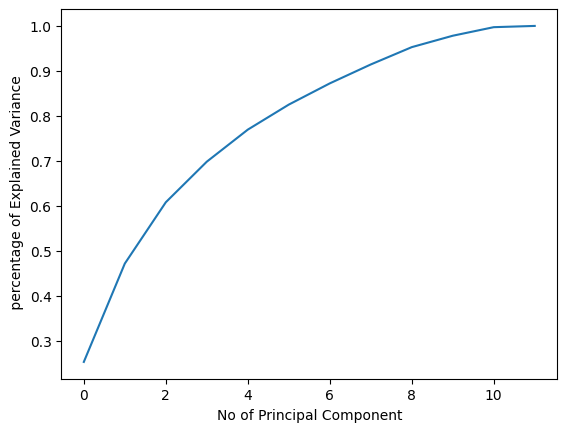

In [129]:
plt.plot(np.cumsum(percentage_explained_variance))
plt.xlabel("No of Principal Component")
plt.ylabel(" percentage of Explained Variance")
plt.show()

In [ ]:
# So Ideally we should Choose 8 PC in order to capture 90% of variance of the data and accuracy
# Will also imporove if we take 8PC

PCA for non linear data ( Kernel PCA)

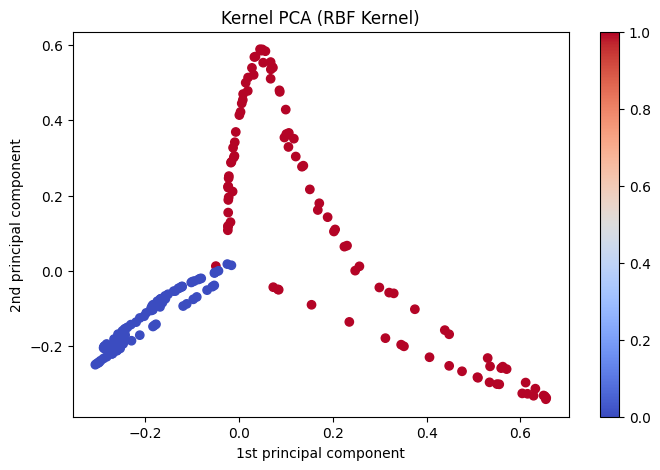

In [144]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Example: nonlinear dataset (two moons)
X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

# Apply Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8,5))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap="coolwarm")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.title("Kernel PCA (RBF Kernel)")
plt.colorbar()
plt.show()


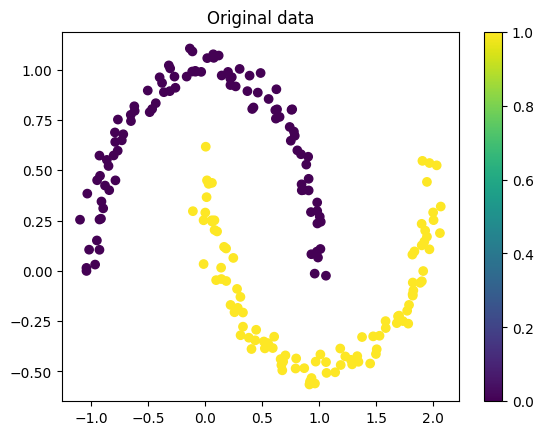

In [143]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')  # or 'plasma', 'coolwarm', etc.
plt.title("Original data")
plt.colorbar()  # optional, shows color scale
plt.show()
